<a href="https://colab.research.google.com/github/Deepjyoti7147/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')
# List the contents of the MyFiles directory
# !ls '/content/drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import zipfile

zip_path = '/content/drive/MyDrive/ML/archive.zip'-
extract_path = '/content/drive/MyDrive/ML'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [38]:
# ! pip install pandas numpy seaborn scikit-learn
# ! pip install matplotlib

In [39]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data =  pd.read_csv("/content/drive/MyDrive/ML/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12005,-117.55,33.89,25.0,2999.0,439.0,1396.0,458.0,5.6973,INLAND,164800.0
16206,-121.32,37.95,40.0,964.0,230.0,742.0,209.0,1.2625,INLAND,43000.0
222,-122.20,37.80,43.0,3045.0,499.0,1115.0,455.0,4.9559,NEAR BAY,273000.0
11747,-121.14,38.84,22.0,2750.0,433.0,1161.0,428.0,4.2143,INLAND,236500.0
4655,-118.33,34.05,44.0,1574.0,390.0,1323.0,404.0,2.5284,<1H OCEAN,226300.0
...,...,...,...,...,...,...,...,...,...,...
9373,-122.53,37.92,45.0,1530.0,324.0,608.0,328.0,3.8750,NEAR BAY,390800.0
12237,-116.94,33.74,19.0,2901.0,445.0,1414.0,475.0,4.6406,INLAND,118900.0
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN,303800.0
13889,-116.57,35.43,8.0,9975.0,1743.0,6835.0,1439.0,2.7138,INLAND,22500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

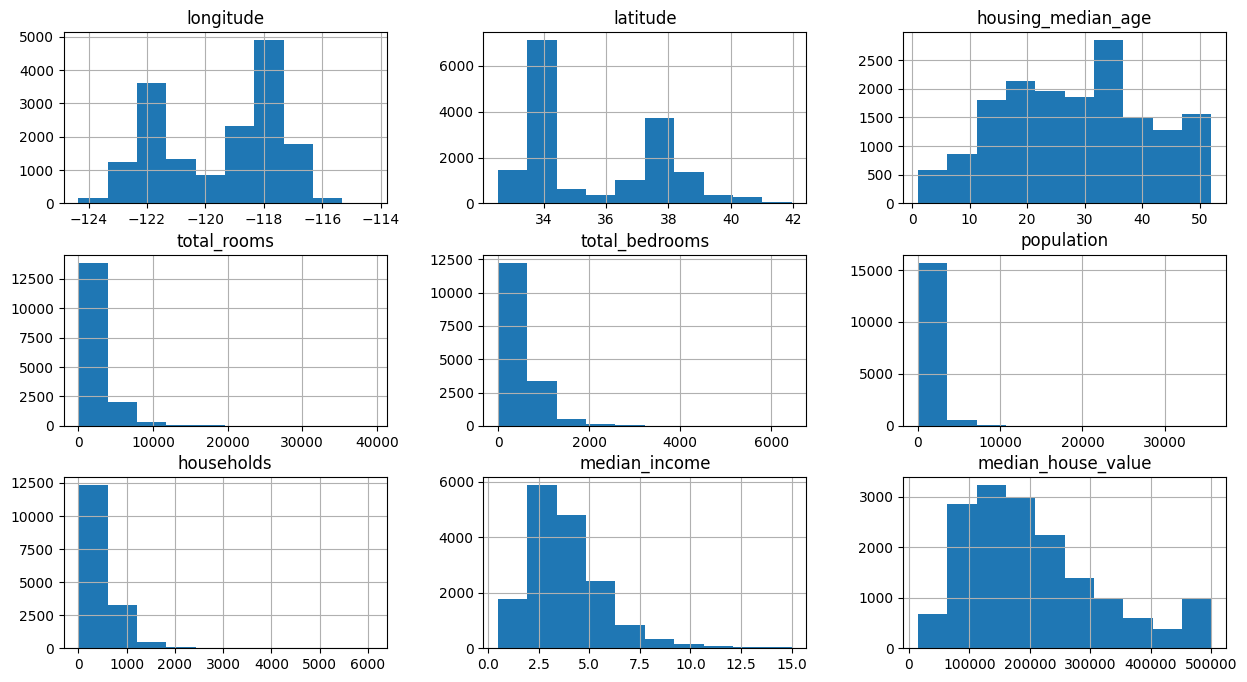

In [46]:
train_data.hist(figsize=(15, 8))

In [47]:
train_data.corr()

<ipython-input-47-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924853,-0.109732,0.045273,0.068152,0.101381,0.056271,-0.016292,-0.049947
latitude,-0.924853,1.000000,0.013924,-0.037119,-0.066631,-0.110299,-0.071975,-0.079459,-0.140326
housing_median_age,-0.109732,0.013924,1.000000,-0.357450,-0.318460,-0.290257,-0.300312,-0.116221,0.108564
total_rooms,0.045273,-0.037119,-0.357450,1.000000,0.930408,0.852509,0.918616,0.197327,0.132553
total_bedrooms,0.068152,-0.066631,-0.318460,0.930408,1.000000,0.876293,0.980964,-0.008141,0.048955
population,0.101381,-0.110299,-0.290257,0.852509,0.876293,1.000000,0.903975,0.001314,-0.028820
households,0.056271,-0.071975,-0.300312,0.918616,0.980964,0.903975,1.000000,0.011478,0.063048
median_income,-0.016292,-0.079459,-0.116221,0.197327,-0.008141,0.001314,0.011478,1.000000,0.690171
median_house_value,-0.049947,-0.140326,0.108564,0.132553,0.048955,-0.028820,0.063048,0.690171,1.000000


<ipython-input-48-42c4b4918ab0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True, cmap="YlGnBu")


<Axes: >

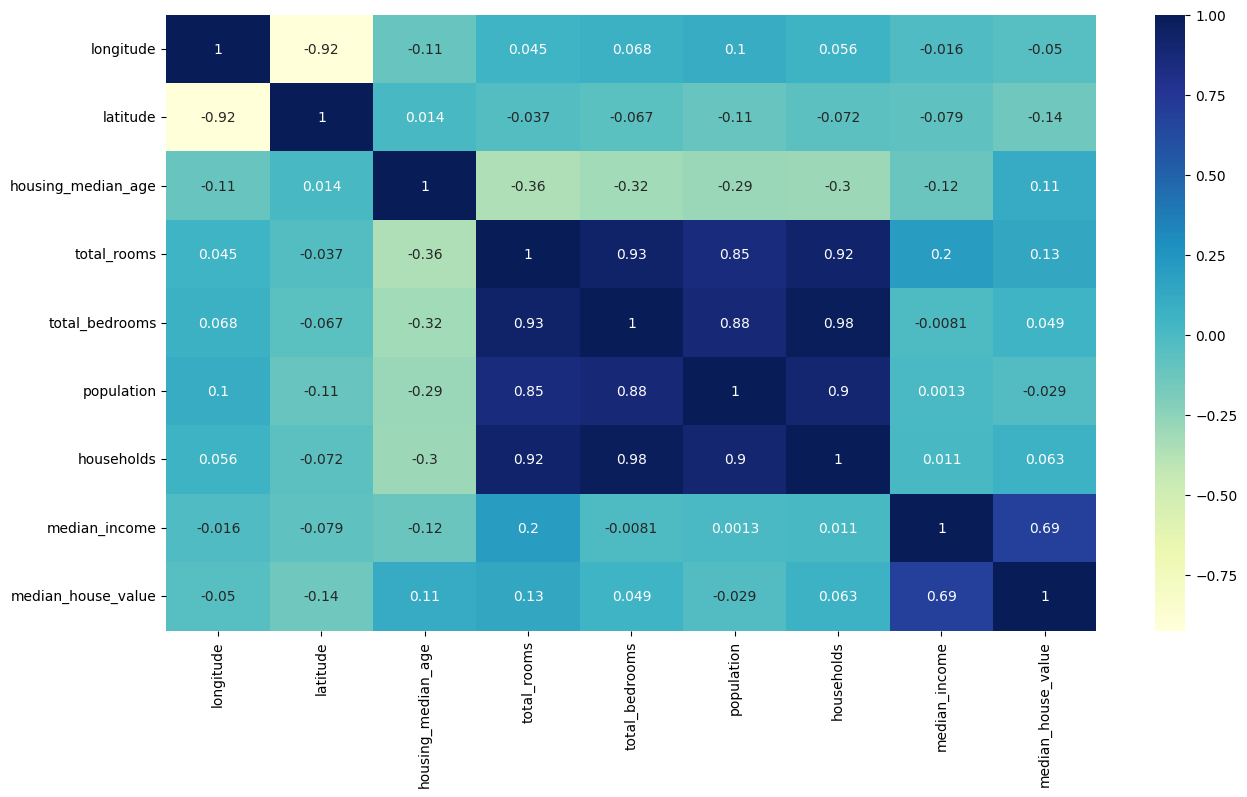

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

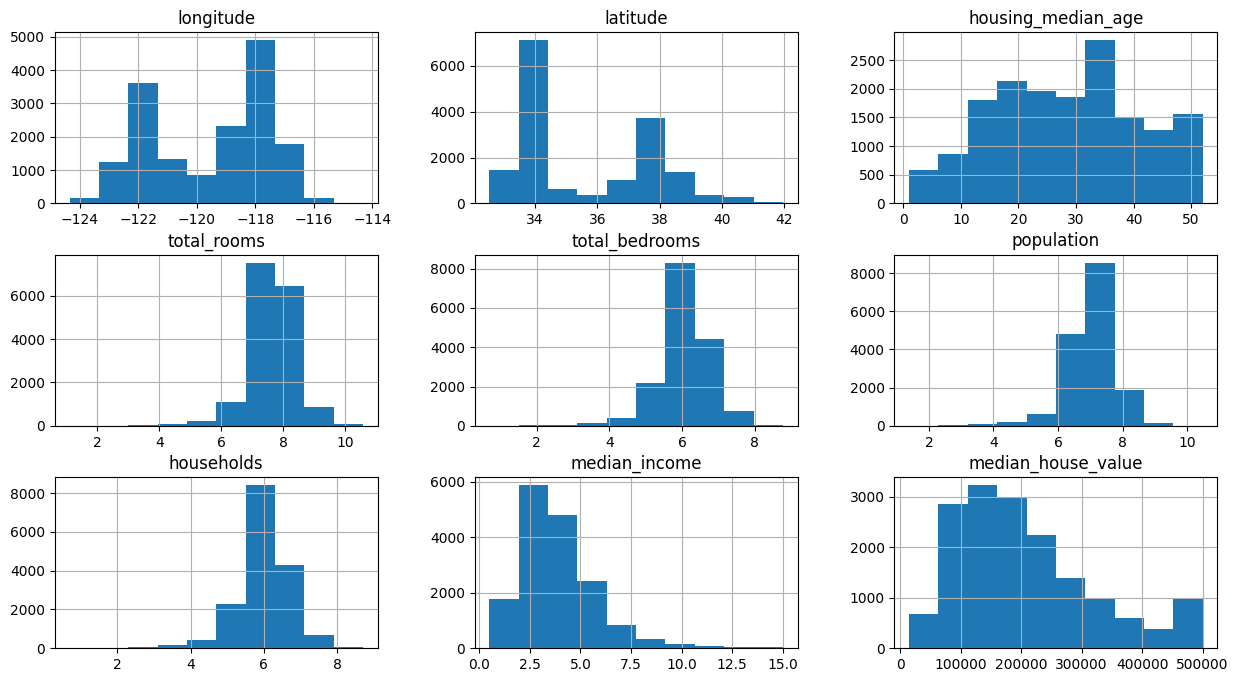

In [49]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize= (15,8))

In [50]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7244
INLAND        5185
NEAR OCEAN    2113
NEAR BAY      1800
ISLAND           4
Name: ocean_proximity, dtype: int64

In [51]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: xlabel='latitude', ylabel='longitude'>

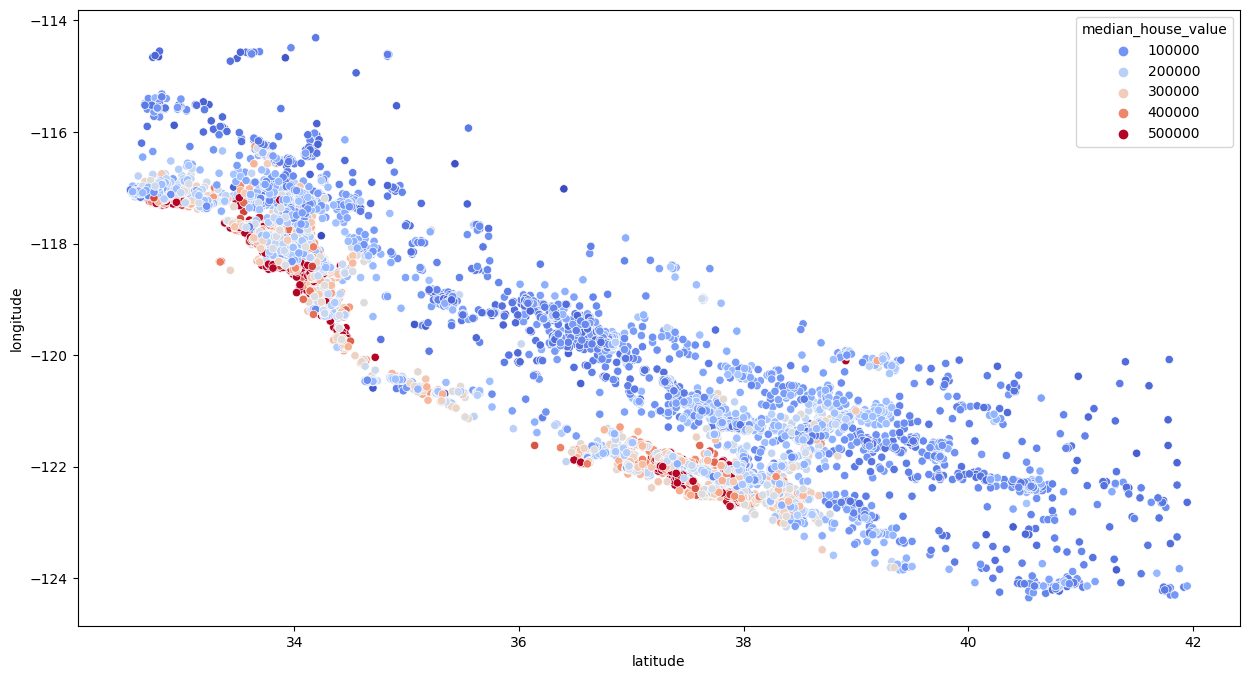

In [52]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue= "median_house_value",palette="coolwarm")

In [53]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

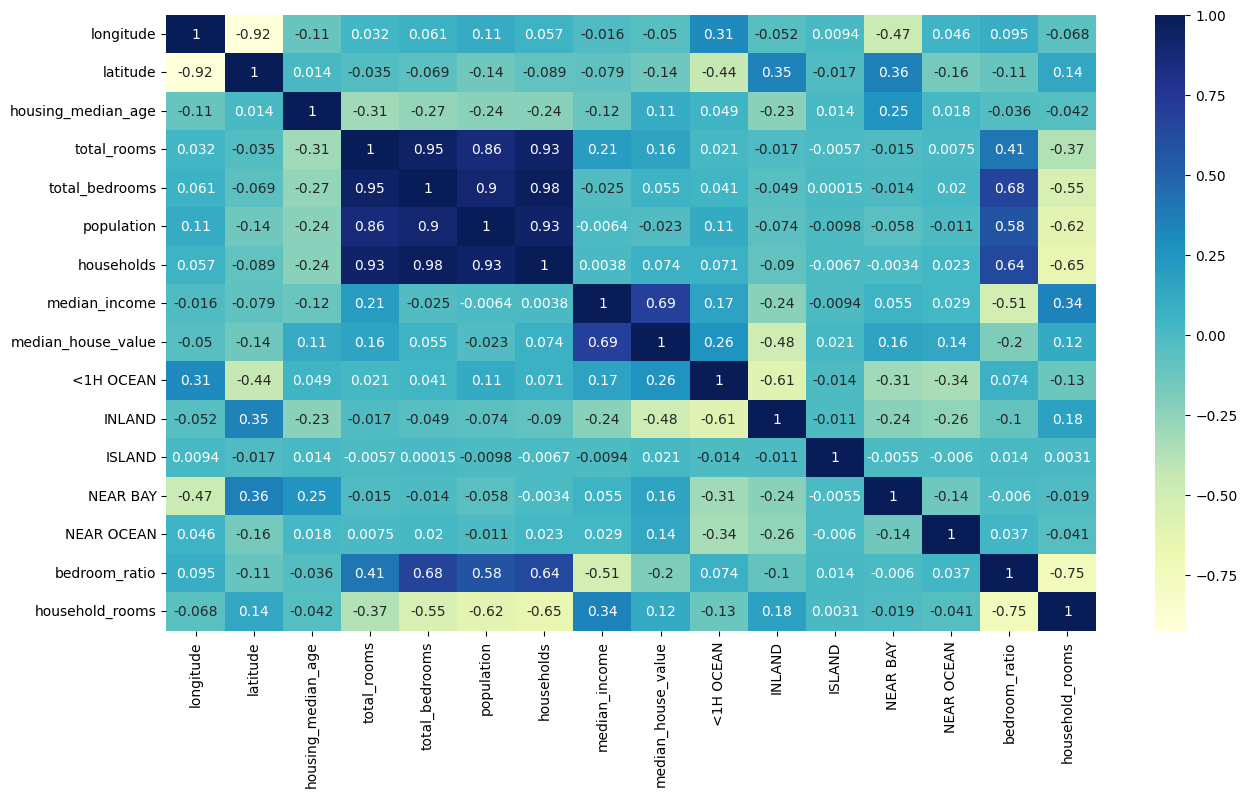

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True, cmap="YlGnBu")

# Using LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [56]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [57]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12663,-121.46,38.49,15.0,9.231319,7.598900,8.640649,7.469084,2.5750,107900.0,0,1,0,0,0,0.823165,1.235937
9100,-117.92,34.59,7.0,6.525030,4.836282,6.186209,4.653960,2.7396,125600.0,0,1,0,0,0,0.741189,1.402038
19178,-122.66,38.42,14.0,8.578476,6.945051,7.709308,6.857514,4.0230,208400.0,1,0,0,0,0,0.809590,1.250960
5291,-118.42,34.08,46.0,7.244228,5.003946,6.018593,5.030438,15.0001,500001.0,1,0,0,0,0,0.690749,1.440079
3292,-122.70,39.00,18.0,6.677083,5.003946,5.231109,4.094345,2.3125,162500.0,0,1,0,0,0,0.749421,1.630806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,-121.93,36.59,25.0,7.697121,5.869297,6.434547,5.690359,5.0621,386500.0,0,0,0,0,1,0.762531,1.352660
14452,-117.27,32.84,34.0,7.412160,6.111467,6.769642,6.021023,3.2109,376000.0,0,0,0,0,1,0.824519,1.231047
3183,-119.77,36.30,24.0,7.697575,6.156979,6.959399,6.086775,2.1038,62000.0,0,1,0,0,0,0.799860,1.264639
223,-122.20,37.80,52.0,7.344719,5.683580,6.561031,5.594711,4.7721,217100.0,0,0,0,1,0,0.773832,1.312797


In [58]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12005,-117.55,33.89,25.0,8.006368,6.086775,7.242082,6.129050,5.6973,164800.0,0,1,0,0,0,0.760242,1.306298
16206,-121.32,37.95,40.0,6.872128,5.442418,6.610696,5.347108,1.2625,43000.0,0,1,0,0,0,0.791955,1.285205
222,-122.20,37.80,43.0,8.021585,6.214608,7.017506,6.122493,4.9559,273000.0,0,0,0,1,0,0.774736,1.310183
11747,-121.14,38.84,22.0,7.919720,6.073045,7.057898,6.061457,4.2143,236500.0,0,1,0,0,0,0.766826,1.306570
4655,-118.33,34.05,44.0,7.362011,5.968708,7.188413,6.003887,2.5284,226300.0,1,0,0,0,0,0.810744,1.226207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,-122.53,37.92,45.0,7.333676,5.783825,6.411818,5.796058,3.8750,390800.0,0,0,0,1,0,0.788667,1.265287
12237,-116.94,33.74,19.0,7.973155,6.100319,7.254885,6.165418,4.6406,118900.0,0,1,0,0,0,0.765107,1.293206
10111,-117.94,33.94,25.0,8.086718,6.304449,7.281386,6.218600,5.1084,303800.0,1,0,0,0,0,0.779605,1.300408
13889,-116.57,35.43,8.0,9.207937,7.463937,8.829958,7.272398,2.7138,22500.0,0,1,0,0,0,0.810598,1.266149


In [59]:
reg.score(x_test,y_test)

0.6604934797050789

# Using Random Forest Model
We can see that the accuracy score has increased

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
forest.score(x_test,y_test)

0.8116448991021256

In [62]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
import joblib


joblib.dump(grid_search, "/content/drive/MyDrive/ML/model.pkl")




['/content/drive/MyDrive/ML/model.pkl']

In [64]:
best_forest = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [65]:
best_forest.score(x_test,y_test)

0.8110415774076389